In [1]:
import torch, torchvision
from torch.autograd import Variable
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import Sampler
import itertools, math
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

## CNN Configuration

In [2]:
class TestDataSet(Dataset):
    def __init__(self):
        super().__init__()
        self.z = range(10)
    def __getitem__(self, i):
        return self.z[i]
    def __len__(self):
        return len(self.z)

In [3]:
data = TestDataSet()

## Dataset

In [4]:
indices = range(10)

In [5]:
class ShuffleCycleSubsetSampler(Sampler):
    """A cycle version of SubsetRandomSampler with
        reordering on restart"""
    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return self._gen()

    def _gen(self):
        i = len(self.indices)
        #perm = np.random.permutation(self.indices)
        while True:
            if i >= len(self.indices):
                perm = np.random.permutation(self.indices)
                i=0
            yield perm[i]
            i+=1
    
    def __len__(self):
        return len(self.indices)

In [6]:
sam2 = ShuffleCycleSubsetSampler(indices)

In [7]:
dl = DataLoader(data, batch_size=5, sampler = sam2)

In [8]:
it = iter(dl); it2 = iter(sam2)

In [27]:
G = torch.load('/home/maf388/bayesganfuture/models/dcganG.pt')

In [28]:
class GanDataLoader(DataLoader):
    def __init__(self, generator, batch_size):
        self.G = generator.cuda()
        self.batch_size = batch_size

    def __iter__(self):
        return self
    
    def __next__(self):
        z = Variable(torch.randn(self.batch_size, self.G.z_dim).cuda())
        return self.G(z).detach()
    
    def __len__(self):
        inf = 2**63-1
        return inf

In [29]:
thisLoader = GanDataLoader(G,32)

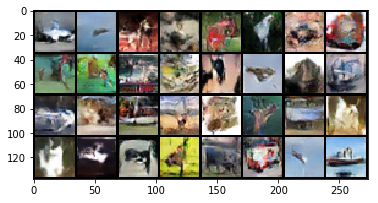

In [30]:
batch = next(thisLoader)
imgs = torchvision.utils.make_grid(batch.cpu().data, normalize=True, nrow=8)
plt.imshow(np.transpose(imgs, (1, 2, 0)))

In [31]:
D = torch.load('/home/maf388/bayesganfuture/models/dcganD.pt')

In [22]:
import os
import sys

In [25]:
sys.path

['',
 '/home/maf388/.conda/envs/env0/lib/python35.zip',
 '/home/maf388/.conda/envs/env0/lib/python3.5',
 '/home/maf388/.conda/envs/env0/lib/python3.5/plat-linux',
 '/home/maf388/.conda/envs/env0/lib/python3.5/lib-dynload',
 '/home/maf388/.conda/envs/env0/lib/python3.5/site-packages',
 '/home/maf388/bayesganfuture',
 '/home/maf388/.conda/envs/env0/lib/python3.5/site-packages/torchvision-0.2.0-py3.5.egg',
 '/home/maf388/.conda/envs/env0/lib/python3.5/site-packages/IPython/extensions',
 '/home/maf388/.ipython']